In [1]:
import os
import numpy as np

In [2]:
# pwd
os.chdir('C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\DDD')

In [3]:
import csv
data = {}
with open('driver_imgs_list.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[1]
    if key in data:
      data[key].append(row[2])
    else:
      data[key] = [row[2]]

In [4]:
data

{'c0': ['img_10206.jpg',
  'img_27079.jpg',
  'img_50749.jpg',
  'img_97089.jpg',
  'img_37741.jpg',
  'img_65697.jpg',
  'img_3866.jpg',
  'img_19098.jpg',
  'img_31885.jpg',
  'img_41423.jpg',
  'img_26907.jpg',
  'img_71304.jpg',
  'img_17470.jpg',
  'img_88793.jpg',
  'img_1367.jpg',
  'img_29348.jpg',
  'img_20878.jpg',
  'img_6461.jpg',
  'img_87811.jpg',
  'img_47410.jpg',
  'img_98046.jpg',
  'img_57583.jpg',
  'img_27214.jpg',
  'img_973.jpg',
  'img_9006.jpg',
  'img_28357.jpg',
  'img_56851.jpg',
  'img_62066.jpg',
  'img_40209.jpg',
  'img_49423.jpg',
  'img_71160.jpg',
  'img_54924.jpg',
  'img_1267.jpg',
  'img_17723.jpg',
  'img_88538.jpg',
  'img_96522.jpg',
  'img_31289.jpg',
  'img_37288.jpg',
  'img_67875.jpg',
  'img_2813.jpg',
  'img_59570.jpg',
  'img_70406.jpg',
  'img_20588.jpg',
  'img_60168.jpg',
  'img_50246.jpg',
  'img_65097.jpg',
  'img_24419.jpg',
  'img_47332.jpg',
  'img_89135.jpg',
  'img_93208.jpg',
  'img_67865.jpg',
  'img_31623.jpg',
  'img_36574.j

In [5]:
pwd

'C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\DDD'

In [5]:
expressions_list = set(list(data.keys()))

In [6]:
expressions_list

{'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'}

In [19]:
pwd

'C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\DDD'

In [56]:
import splitfolders
splitfolders.ratio(r'C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\DDD\\imgs\\train', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 17462 files [00:35, 487.67 files/s]


In [99]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [100]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [101]:
from tensorflow.keras.losses import categorical_crossentropy
# building and compiling model using CNN
model = tf.keras.models.Sequential(
    [
        Conv2D(16, (3,3), activation = 'relu', input_shape = (100,100,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)
model.compile(optimizer = 'adam', loss = categorical_crossentropy,metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 10, 10, 64)       

In [102]:
from keras.preprocessing.image import ImageDataGenerator


train_dir = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\train'
test_dir = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\test'
valid_dir = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\val'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

valid_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

Found 13965 images belonging to 10 classes.
Found 1755 images belonging to 10 classes.
Found 1742 images belonging to 10 classes.


In [103]:

from keras.callbacks import ModelCheckpoint, EarlyStopping

# to prevent the model from unnecessary training
es = EarlyStopping(monitor = 'accuracy', patience = 2, min_delta = 0.01)

In [104]:
history = model.fit(train_generator, epochs = 8, verbose = 1, batch_size = 500, validation_data = valid_generator, callbacks = [es])

Epoch 1/8
110/110 [==============================] - 69s 611ms/step - loss: 1.1097 - accuracy: 0.6325 - val_loss: 0.2426 - val_accuracy: 0.9380
Epoch 2/8
110/110 [==============================] - 65s 591ms/step - loss: 0.1336 - accuracy: 0.9646 - val_loss: 0.1004 - val_accuracy: 0.9753
Epoch 3/8
110/110 [==============================] - 65s 592ms/step - loss: 0.0596 - accuracy: 0.9835 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 4/8
110/110 [==============================] - 67s 605ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0546 - val_accuracy: 0.9828
Epoch 5/8
110/110 [==============================] - 66s 600ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0493 - val_accuracy: 0.9851
Epoch 6/8
110/110 [==============================] - 68s 614ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 7/8
110/110 [==============================] - 67s 606ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0411 - val_accuracy:

In [105]:
scores = model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))


14/14 [==============================] - 5s 373ms/step - loss: 0.0401 - accuracy: 0.9897
evaluate accuracy: 98.97%


In [106]:
meaning = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}



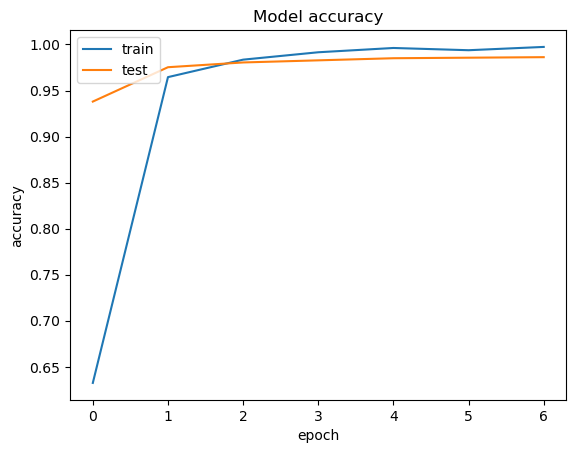

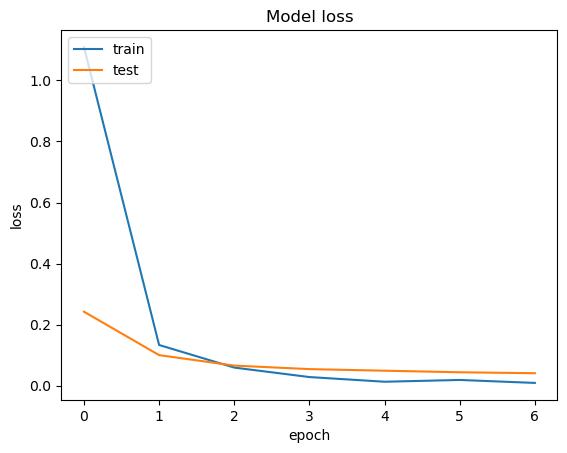

In [107]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_train_history(history)


In [110]:
valid_samples = 1742 
batch_size = 128
score = model.evaluate_generator(valid_generator, valid_samples // batch_size, verbose = 1)
print("Test loss:", score[0])
print("Test Accuracy:", score[1])

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_16168\926742426.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(valid_generator, valid_samples // batch_size, verbose = 1)


13/13 [==============================] - 5s 401ms/step - loss: 0.0389 - accuracy: 0.9862
Test loss: 0.038911860436201096
Test Accuracy: 0.9861778616905212


In [125]:
from PIL import Image
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (100, 100, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(r"C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\train\c1\img_149.jpg")
model.predict(image)

1/1 [==============================] - 0s 54ms/step


array([[2.4415492e-03, 9.9534059e-01, 2.5185258e-07, 1.3054780e-07,
        3.2634790e-07, 4.9447397e-08, 1.6404519e-10, 3.5351341e-06,
        2.1861268e-03, 2.7470373e-05]], dtype=float32)